<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

# 1. Die Rolls

Dice throws are another easy experiment to conduct. But first let us look at how we can reproduce the sampled data. To do this we can set the `seed` value of the random number generator to a chosen value.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
np.random.seed(666)
print(np.random.randint(9))

2


If we run the experiment again, we might get a different set of numbers.

In [7]:
print(np.random.randint(9))

6


In [8]:
np.random.seed(666)
print(np.random.randint(9))
print(np.random.randint(9))

2
6


## Exercise
Now consider a fair die. Each face has probability $\frac16$. We simulate $n$ die rolls and plot the empirical probability of each face, alongside the theoretical probability. 

In [23]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,1000),continuos_update=False)
def probability_plot(n):
    """ 
        input: n (generate n random die rolls)
        output: Count (counting the occurance of each event )
    """
    #
    # YOUR CODE HERE
    Count = np.zeros((6,n+1),int)      # create a zere array
    for i in range(1,n+1):             # test n times 
        res = np.random.randint(1,7)   # get a random integer from 1 to 6
        if res == 1:                   # judge which face the result stand for 
            Count[0,i] += 1
        elif res == 2:
            Count[1,i] += 1
        elif res == 3:
            Count[2,i] += 1
        elif res == 4:
            Count[3,i] += 1
        elif res == 5:
            Count[4,i] += 1
        elif res == 6:
            Count[5,i] += 1 
        Count[0,i] += Count[0,i-1]     # accumulate the result for each face
        Count[1,i] += Count[1,i-1]
        Count[2,i] += Count[2,i-1]
        Count[3,i] += Count[3,i-1]
        Count[4,i] += Count[4,i-1]
        Count[5,i] += Count[5,i-1]

    # plot the empirical values
    for i in range(6):
        Prob = Count[i,1:]/np.arange(1,n+1)
        plt.plot(np.arange(1, n + 1), Prob, linewidth=2.0, label='Face '+str(i+1))
    
    plt.plot(range(0, n), [1 / 6] * n, 'k', linewidth=3.0, label='Theoretical probability')
    plt.title("Empirical and theoretical probabilities of the 6 faces")
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=505, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

Next consider the event $E=\{2,4,6\}$ that the outcome is even. Clearly $P(E)=\frac36=\frac{1}{2}=0.5$.

The next cell simulates $n$ die rolls and plots the theoretical and empirical probabilities of $E$.

In [4]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),continuous_update=False)
def probability_plot_B(n):
    """ 
        input: n (generate n random die rolls)
        output: Prob_E (calculating the probability of even throw's)
        hint: counting the events of even numbers
    """
    #
    # YOUR CODE HERE
    Count = np.zeros((n+1),int)              # create one dimasional array
    for i in range(1,n+1):                  
        res = np.random.randint(1,7)         # get a random integer from 1 to 6
        if res == 2 or res == 4 or res == 6: # judge whether the result is whether 2,4,6
            Count[i] += 1
        Count[i] += Count[i-1]               # accumulate the result
    Prob_E = Count[1:]/np.arange(1,n+1)      # compute the probability of the event E
    #
    # plot
    plt.plot(range(1,n+1),Prob_E, 'b', linewidth= 2,label='Empirical probability')    
    plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.title("Odds of rolling an even number")
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), Output()), _dom_classes=('wid…

# 2. Conditional Probability and Baye's Rule


## Exercise

There are two urns $A$ and $B$. Urn $A$ contains $r_A$ red balls and $w_A$ white balls whereas urn $B$ contains $r_B$ red balls and $w_B$ white balls. One of the urns is picked at random and then one ball is picked at random from this urn. Write a function **conditional_probability** that calculates the conditional probability that the randomly chosen ball belonged to urn $A$ given that it is white. Assume that $\frac{r_A}{w_A}\neq\frac{r_B}{w_B}$.

<font  style="color:blue"> **Code**</font>
```python
rA, wA, rB, wB = 1., 2., 2., 1.
conditional__probability(rA, wA, rB, wB) 
```

<font  style="color:magenta"> **Output**</font>
```
0.6666666666666666
```

In [14]:
# modify this cell

def conditional__probability(rA, wA, rB, wB):
    # inputs: all of them are of type 'float'
    # output: a variable of type 'float'
    
    #
    # YOUR CODE HERE
    p_rA_A = rA/(rA+wA) # p(rA|A)
    p_wA_A = wA/(rA+wA) # p(wA|A)
    p_rB_B = rB/(rB+wB) # p(rB|B)
    p_wB_B = wB/(rB+wB) # p(wB|B)
    p_A = 0.5 # p(A)
    p_B = 0.5 # p(B)
    p_wA = p_wA_A*p_A # p(AwA)
    p_wB = p_wB_B*p_B # p(BwB)
    p_w = p_wA+p_wB # p(w) which is the probability of the white balls picked
    p_A_w = p_wA/p_w # p(A|w) 
    #print("p(A|w):",p_A_w)  #check the result
    return p_A_w
    #   


In [15]:
assert( abs(conditional__probability(2., 4., 3., 3.) -0.5714285714285715) < 10**-5)  
assert( abs(conditional__probability(1., 3., 5., 2.) -0.7241379310344829) < 10**-5) 

#
# AUTOGRADER TEST - DO NOT REMOVE
#


p(A|w): 0.5714285714285715
p(A|w): 0.7241379310344829


# 3. Conditional probability analysis for math scores


Please try the same analysis for the students math scores following the same process conducted for Portuguese scores shown in Sec. 5 in "Experiment 2_Lecture" Notebook. **Insert new cells below to finish the process.**

In [18]:
# modify this cell

import pandas as pd
import matplotlib.pyplot as plt
data_math = pd.read_csv("./dataset/student-por.csv") # read the data file

attributes = ["G3","studytime"]
data_mat = data_math[attributes] # get the data of G3 and studytiime

Text(0.5, 0, 'Study Interval')

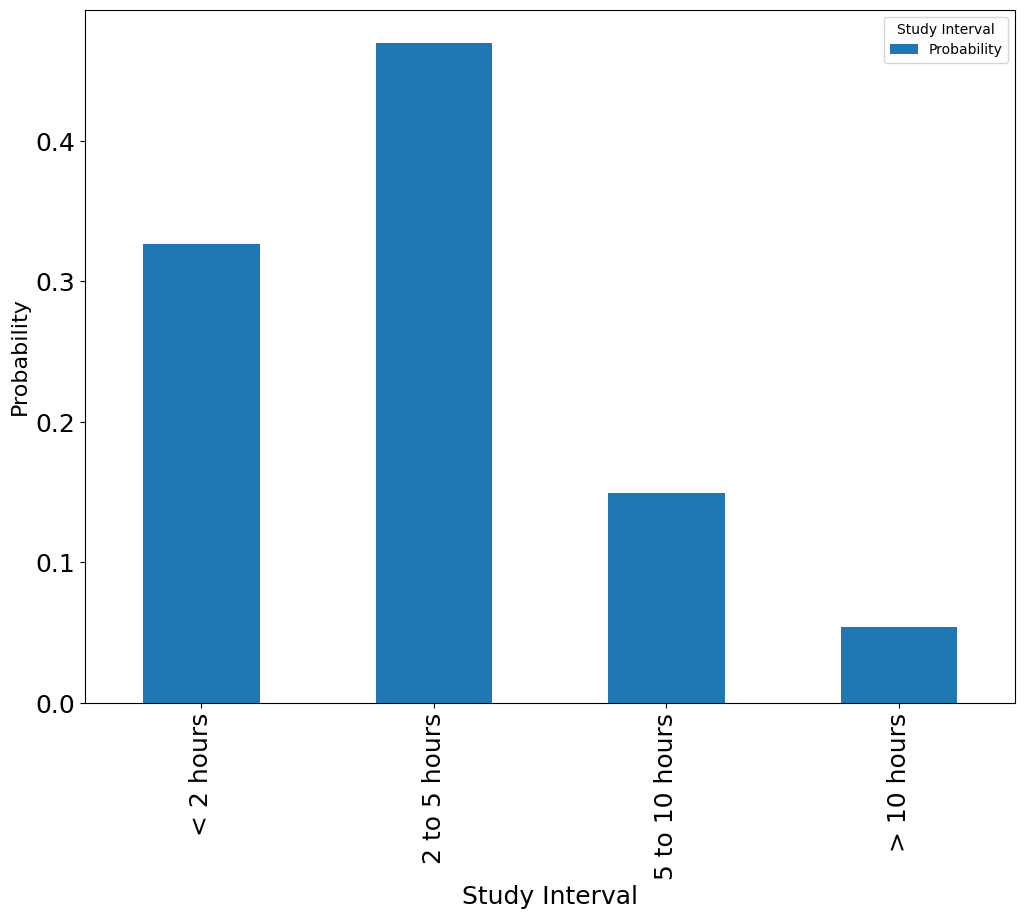

In [19]:
# plot the probability of each studytime interval
data_temp = data_mat["studytime"].value_counts()
P_studytime = pd.DataFrame((data_temp/data_temp.sum()).sort_index())
P_studytime.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_studytime.columns = ["Probability"]
P_studytime.columns.name = "Study Interval"

P_studytime.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Study Interval",fontsize=18)

Score  Probability
Low       0.798151
High      0.201849


Text(0, 0.5, 'Probability')

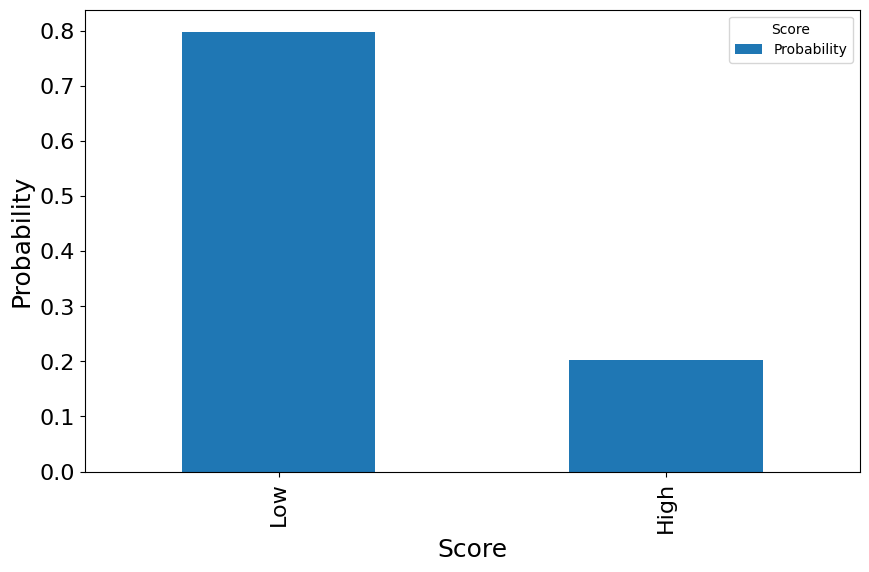

In [20]:
# plot the probability of low and high score
data_temp = (data_mat["G3"]>=15).value_counts() # Let us call scores of at least 15 "high"
P_score15_p = pd.DataFrame(data_temp/data_temp.sum())
P_score15_p.index = ["Low","High"]
P_score15_p.columns = ["Probability"]
P_score15_p.columns.name = "Score"
print(P_score15_p)
P_score15_p.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Probability of study interval given that the student gets a highscore:


Text(0, 0.5, 'Probability')

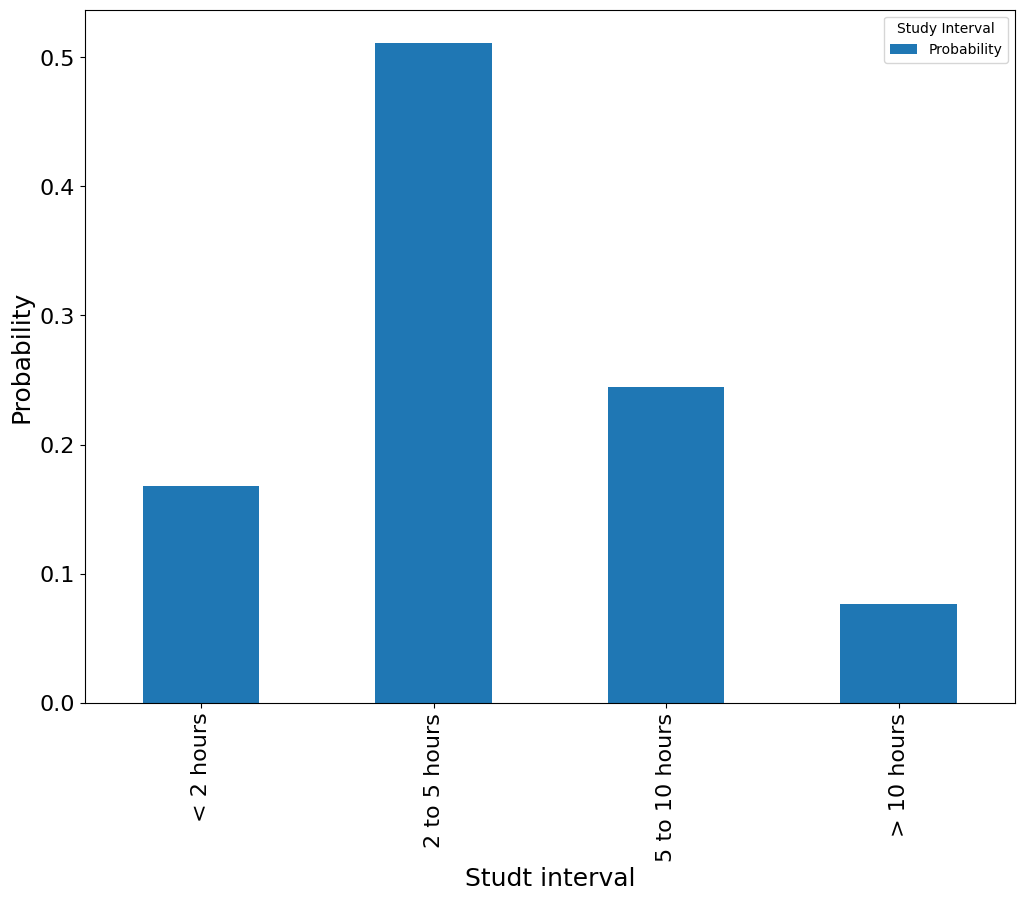

In [21]:
score = 15
data_temp = data_mat.loc[data_mat["G3"]>=score,"studytime"]
P_T_given_score15= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_given_score15.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_T_given_score15.columns = ["Probability"]
print("Probability of study interval given that the student gets a highscore:")
P_T_given_score15.columns.name="Study Interval"
P_T_given_score15.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Studt interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Probability of high score given study interval :


Text(0, 0.5, 'Probability')

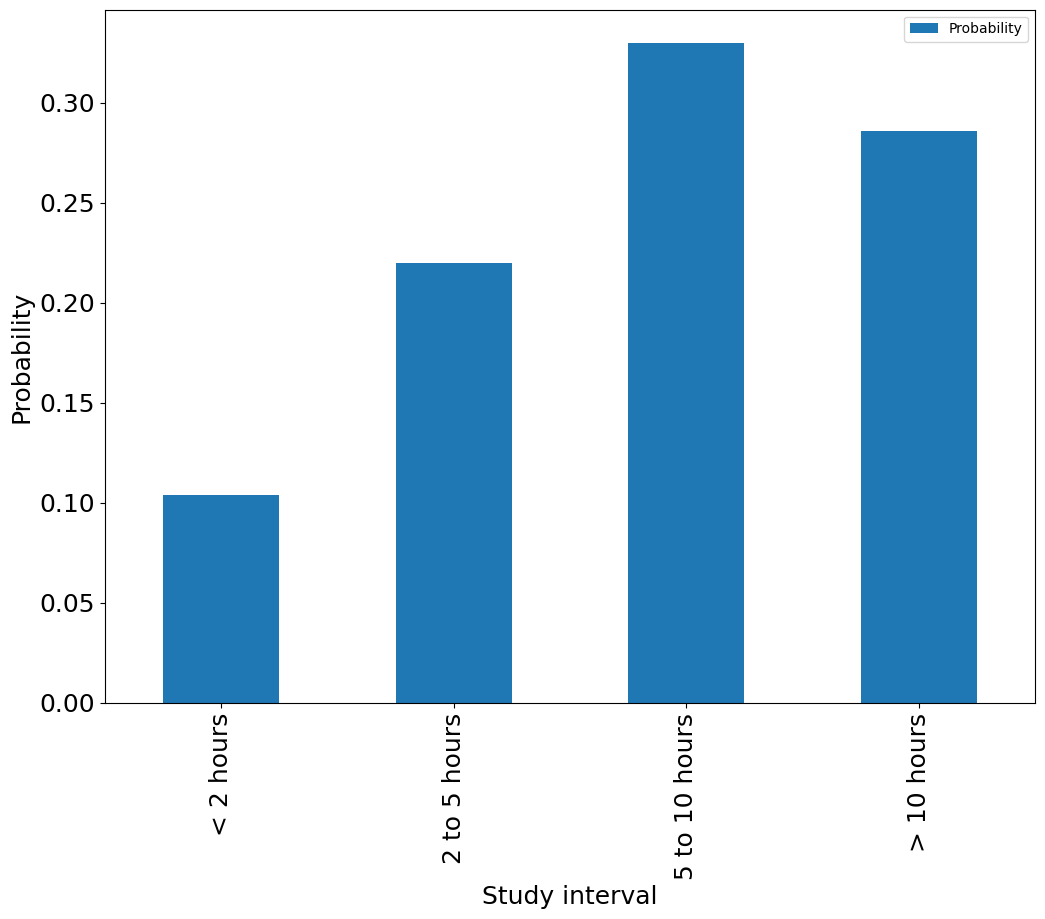

In [22]:
P_score15_given_T_p = P_T_given_score15 * P_score15_p.loc["High"] / P_studytime
print("Probability of high score given study interval :")
pd.DataFrame(P_score15_given_T_p).plot.bar(figsize=(12,9),fontsize=18).legend(loc="best")
plt.xlabel("Study interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)